## Regression
- 선형 회귀 : 종속 변수와 하나 이상의 독립 변수(설명 변수)간의 관계를 모델링하는 선형 접근법


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
# 마이너스 나오게
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False

In [4]:
# 키와 몸무게
heights = [[1.6],[1.65],[1.7],[1.77],[1.85]]
weights = [[60],[65],[70],[77],[85]]

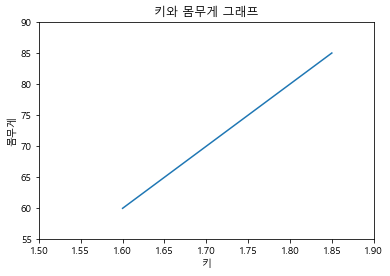

In [7]:
plt.title('키와 몸무게 그래프')
plt.xlabel('키')
plt.ylabel('몸무게')
plt.plot(heights, weights)
plt.axis([1.5,1.90, 55, 90])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr_model = LinearRegression()
# fit 함수는 리스트 또는 배열 형태의 인수를 필요로 한다.
lr_model.fit(heights, weights)

LinearRegression()

In [12]:
weight_pred = lr_model.predict([[1.7],[1.65]])
weight_pred

array([[70.],
       [65.]])

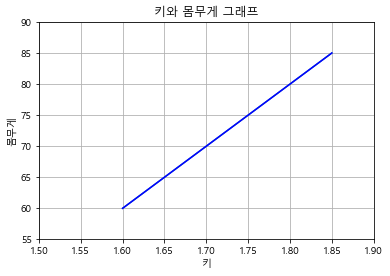

In [15]:
plt.title('키와 몸무게 그래프')
plt.xlabel('키')
plt.ylabel('몸무게')
plt.grid(True)

plt.plot(heights, weights)
plt.axis([1.5,1.90, 55, 90])

# 선형 회귀 선
plt.plot(heights, lr_model.predict(heights), color='blue')
plt.show()

## auto_mpg 을 이용한 선형회귀

In [17]:
import pandas as pd
auto_mpg = pd.read_csv('./data/auto-mpg.csv', header=None)
auto_mpg.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [19]:
auto_mpg.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'accerleration', 'model year', 'origin', 'name']
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,accerleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [20]:
# 데이터의 자료형 확인
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg              398 non-null float64
cylinders        398 non-null int64
displacement     398 non-null float64
horsepower       398 non-null object
weight           398 non-null float64
accerleration    398 non-null float64
model year       398 non-null int64
origin           398 non-null int64
name             398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [22]:
auto_mpg['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [40]:
# horsepower 전처리

import numpy as np

# auto_mpg[auto_mpg['horsepower']=='?']=np.NaN
auto_mpg['horsepower'].replace('?', np.nan, inplace=True)
auto_mpg.dropna(subset=['horsepower'], axis=0, inplace=True) # horsepower 열에서 na 값의 행만 삭제
auto_mpg['horsepower'] = auto_mpg['horsepower'].astype('float')
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg              392 non-null float64
cylinders        392 non-null float64
displacement     392 non-null float64
horsepower       392 non-null float64
weight           392 non-null float64
accerleration    392 non-null float64
model year       392 non-null float64
origin           392 non-null float64
name             392 non-null object
dtypes: float64(8), object(1)
memory usage: 30.6+ KB


In [41]:
# 분석에 활용할 독립변수 선택
cor_df = auto_mpg[['mpg','cylinders','horsepower','weight']]
cor_df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8.0,130.0,3504.0
1,15.0,8.0,165.0,3693.0
2,18.0,8.0,150.0,3436.0
3,16.0,8.0,150.0,3433.0
4,17.0,8.0,140.0,3449.0


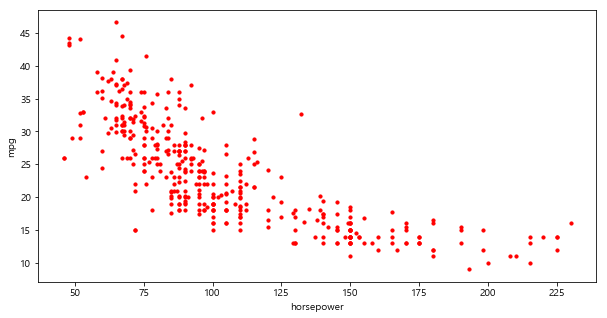

In [47]:
# 선형관계 파악을 위한 산점도 그래프
cor_df.plot(kind='scatter', x='horsepower', y='mpg', c='r', s=10, figsize=(10,5))
plt.show()

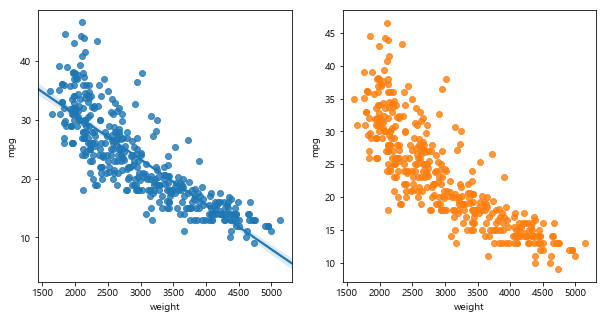

In [49]:
# seaborn 산점도
fig = plt.figure(figsize=(10,5))
area01 = fig.add_subplot(1,2,1)
area02 = fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg', data=cor_df, ax=area01)
sns.regplot(x='weight', y='mpg', data=cor_df, ax=area02, fit_reg=False)
plt.show()

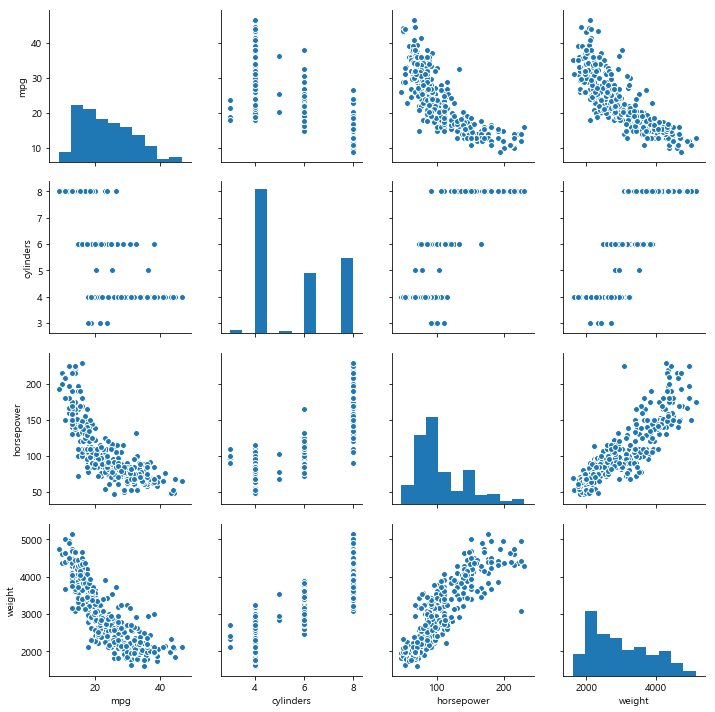

In [50]:
sns.pairplot(cor_df)
plt.show()

In [83]:
X = cor_df[['weight','cylinders','horsepower']] # 독립변수
y = cor_df['mpg']  # 종속변수

In [84]:
# 데이터 세트를 구분
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(len(X_train))
print(len(X_test))

313
79


In [85]:
from sklearn.linear_model import LinearRegression
auto_lr_model=LinearRegression()
auto_lr_model.fit(X_train, y_train)
r_square = auto_lr_model.score(X_test, y_test)
print('결정계수 : ', r_square)

결정계수 :  0.7114913212756985


In [86]:
# 회기의 기울기
print('기울기: ', auto_lr_model.coef_)

# 회기의 절편
print('절편: ', auto_lr_model.intercept_)

기울기:  [-0.005262   -0.35376808 -0.04359149]
절편:  45.70741000710932


In [87]:
# 모델에 전체 X데이터를 입력하여 예측값, 실제값 y 비교
y_pred = auto_lr_model.predict(X)

pred_answer = pd.DataFrame(data={'answer ': y, 'prediction' : y_pred })
pred_answer.head()

,answer,prediction
0,18.0,18.772324
1,15.0,16.252104
2,18.0,18.258310
3,16.0,18.274096
4,17.0,18.625819


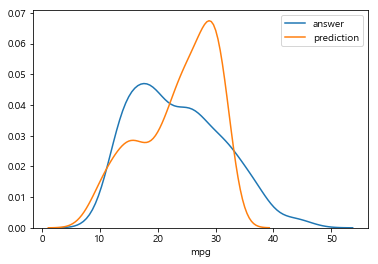

In [89]:
sns.distplot(y, hist=False, label='answer')
sns.distplot(y_pred, hist=False, label='prediction')
plt.show()